In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vice
import seaborn as sns

from statsmodels.distributions import ECDF

In [3]:
import surp
from surp import VICE_Model, subgiants

import arya
arya.style.set_size((10/3, 10/3))

In [4]:
data = pd.read_csv("../data/apogee_cartography.csv", index_col=0)

/tmp/slurmtmp.24868848/ipykernel_127420/3603862041.py:1: DtypeWarning: Columns (126) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/apogee_cartography.csv", index_col=0)


In [5]:
df = data[~data["high_alpha"]].copy()

In [6]:
# Grab cdf
cdf = ECDF(df.R_gal)

bins = np.arange(0, 20, 0.1)

zones = np.arange(0, 200)
Rs = (0.5 + zones)/10
table = pd.DataFrame({"zone": zones, "R": Rs, "cdf": cdf(bins + 0.1)/cdf(bins + 0.1)[-1]})

In [7]:
fiducial = VICE_Model("../out/C11_f0.2.json").stars_unsampled

In [8]:
fiducial.high_alpha

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
131995    1.0
131996    1.0
131997    1.0
131998    1.0
131999    1.0
Name: high_alpha, Length: 132000, dtype: float64

In [11]:
fiducial["[c/h]"] = fiducial["[c/o]"] + fiducial["[o/h]"]
fiducial["[n/h]"] = fiducial["[n/o]"] + fiducial["[o/h]"]

fiducial["[cn/h]"] = surp.gce_math.cpn(fiducial["[c/h]"], fiducial["[n/h]"])
fiducial["[cn/o]"] = fiducial["[cn/h]"] - fiducial["[o/h]"] + 0.075

f = fiducial[0 == fiducial["high_alpha"]]

# Create matching sample

In [12]:
num = 19000

sample = pd.DataFrame(columns=f.columns)
for _ in range(num):
    star = surp.simulation.vice_to_json.rand_star(f, table)
    sample = pd.concat((sample, star), ignore_index=True)

<Axes: xlabel='r_final', ylabel='Density'>

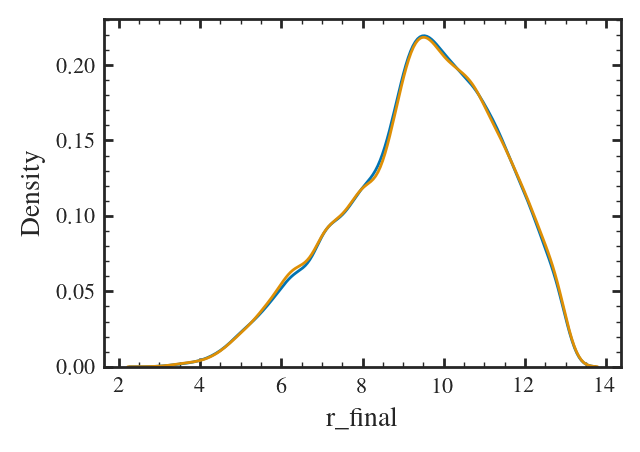

In [15]:
sns.kdeplot(sample.r_final, label="model")
sns.kdeplot(df.R_gal, label="data")

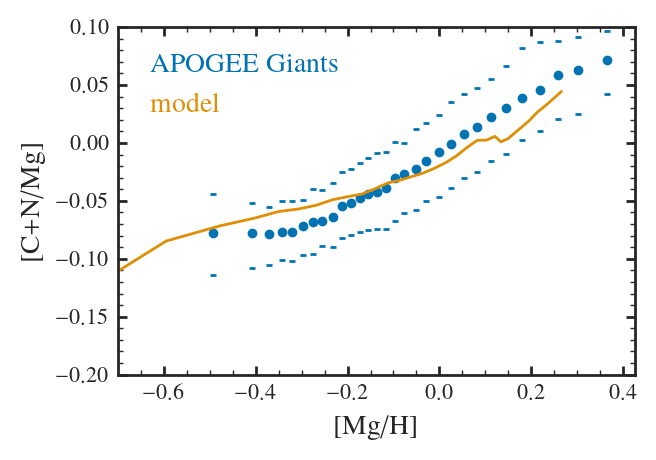

In [16]:
arya.medianplot(df, x="MG_H", y="CN_MG", numbins=30, stat="median", errorbar="pi", label="APOGEE Giants")

sample
arya.medianplot(sample, x="[o/h]", y="[cn/o]", stat="median", errorbar=None,
    aes="line", numbins=30, label="model")

                                        
plt.xlabel("[Mg/H]")
plt.ylabel("[C+N/Mg]")
plt.xlim(-0.7)
plt.ylim(-0.2, 0.1)


arya.Legend(color_only=True)

plt.savefig("c+n.pdf")